# Bank Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Compressed\\Bank-Churn-Predictions\\Bank Customer Churn Prediction.csv")
df.shape

(10000, 12)

In [3]:
df.sample(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1013,15603594,635,Spain,Male,24,4,0.00,2,1,1,70668.77,0
6597,15637774,558,France,Male,32,5,73494.21,1,0,0,136301.10,0
126,15671137,549,France,Female,52,1,0.00,1,0,1,8636.05,1
7891,15652782,678,Germany,Male,48,2,101099.90,2,0,1,193476.04,0
4019,15592091,620,Spain,Male,31,2,166833.86,2,1,1,135171.60,0
2297,15797595,709,France,Female,40,9,131569.63,1,1,1,103970.58,0
9663,15607634,606,Germany,Male,40,9,95293.86,2,0,1,96985.58,0
6609,15766047,748,France,Female,41,2,91621.69,1,1,1,71139.31,0
6264,15708610,690,Germany,Male,44,9,100368.63,2,0,0,35342.33,0
1720,15725024,805,Germany,Female,33,3,105663.56,2,0,1,33330.89,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [8]:
df.duplicated().sum()

0

In [10]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

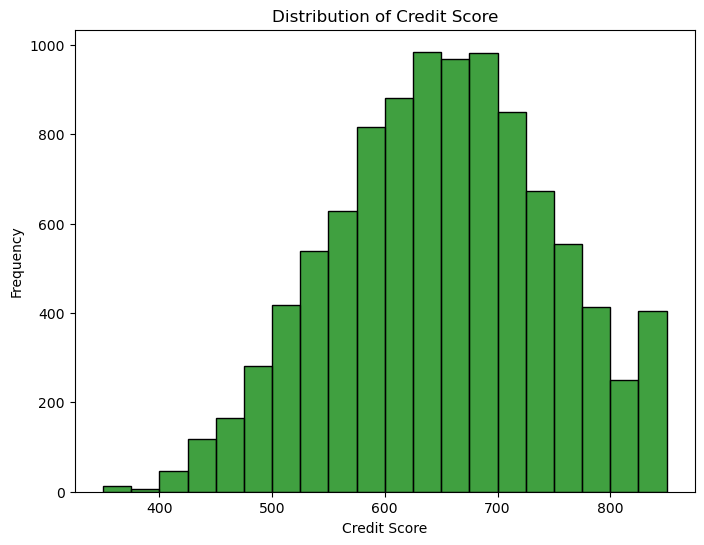

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['credit_score'],bins=20, data=df, color='green')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

In [12]:
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)

In [13]:
IQR = Q3 - Q1
Lower_fence = Q1 - 1.5*IQR
Upper_fence = Q3 + 1.5*IQR

In [14]:
df[df['credit_score'] < Lower_fence]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,15804586,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,15779947,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,15612494,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,15685372,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,15692416,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,15679249,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,15597896,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,15791533,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


# 0.1 Capping

In [15]:
df['credit_score'] = np.where(df['credit_score'] < Lower_fence, Lower_fence,df['credit_score'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Credit Score after Handling Outliers')

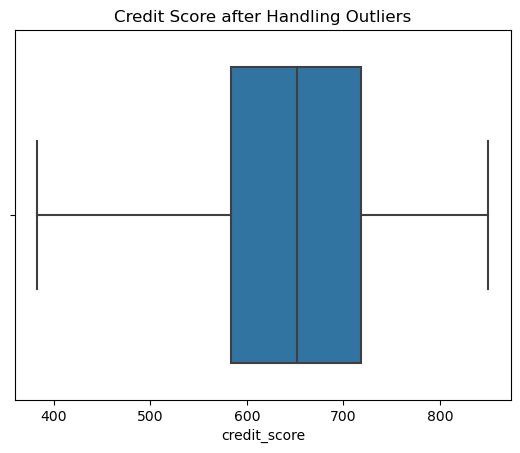

In [16]:
sns.boxplot(df['credit_score'])
plt.title('Credit Score after Handling Outliers')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age before Handling Outliers')

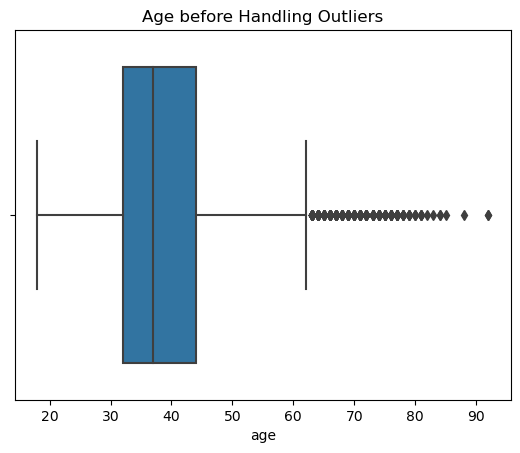

In [17]:
sns.boxplot(df['age'])
plt.title('Age before Handling Outliers')

In [18]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
Lower_fence = Q1 - 1.5*IQR
Upper_fence = Q3 + 1.5*IQR

In [19]:
df['age'] = np.where(df['age'] > Upper_fence, Upper_fence, df['age'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age after Handling Outliers')

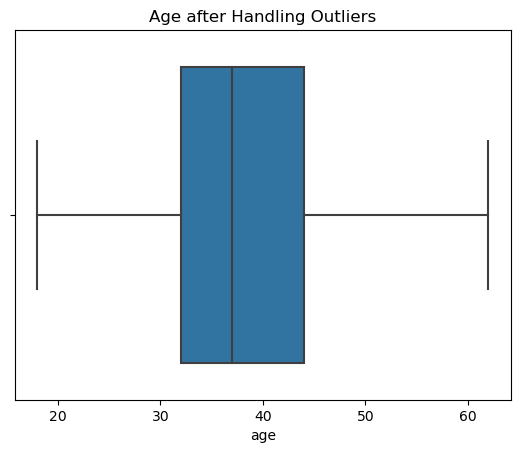

In [20]:
sns.boxplot(df['age'])
plt.title('Age after Handling Outliers')

In [21]:
df.drop(columns=['customer_id'], inplace = True)

In [22]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [23]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [24]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

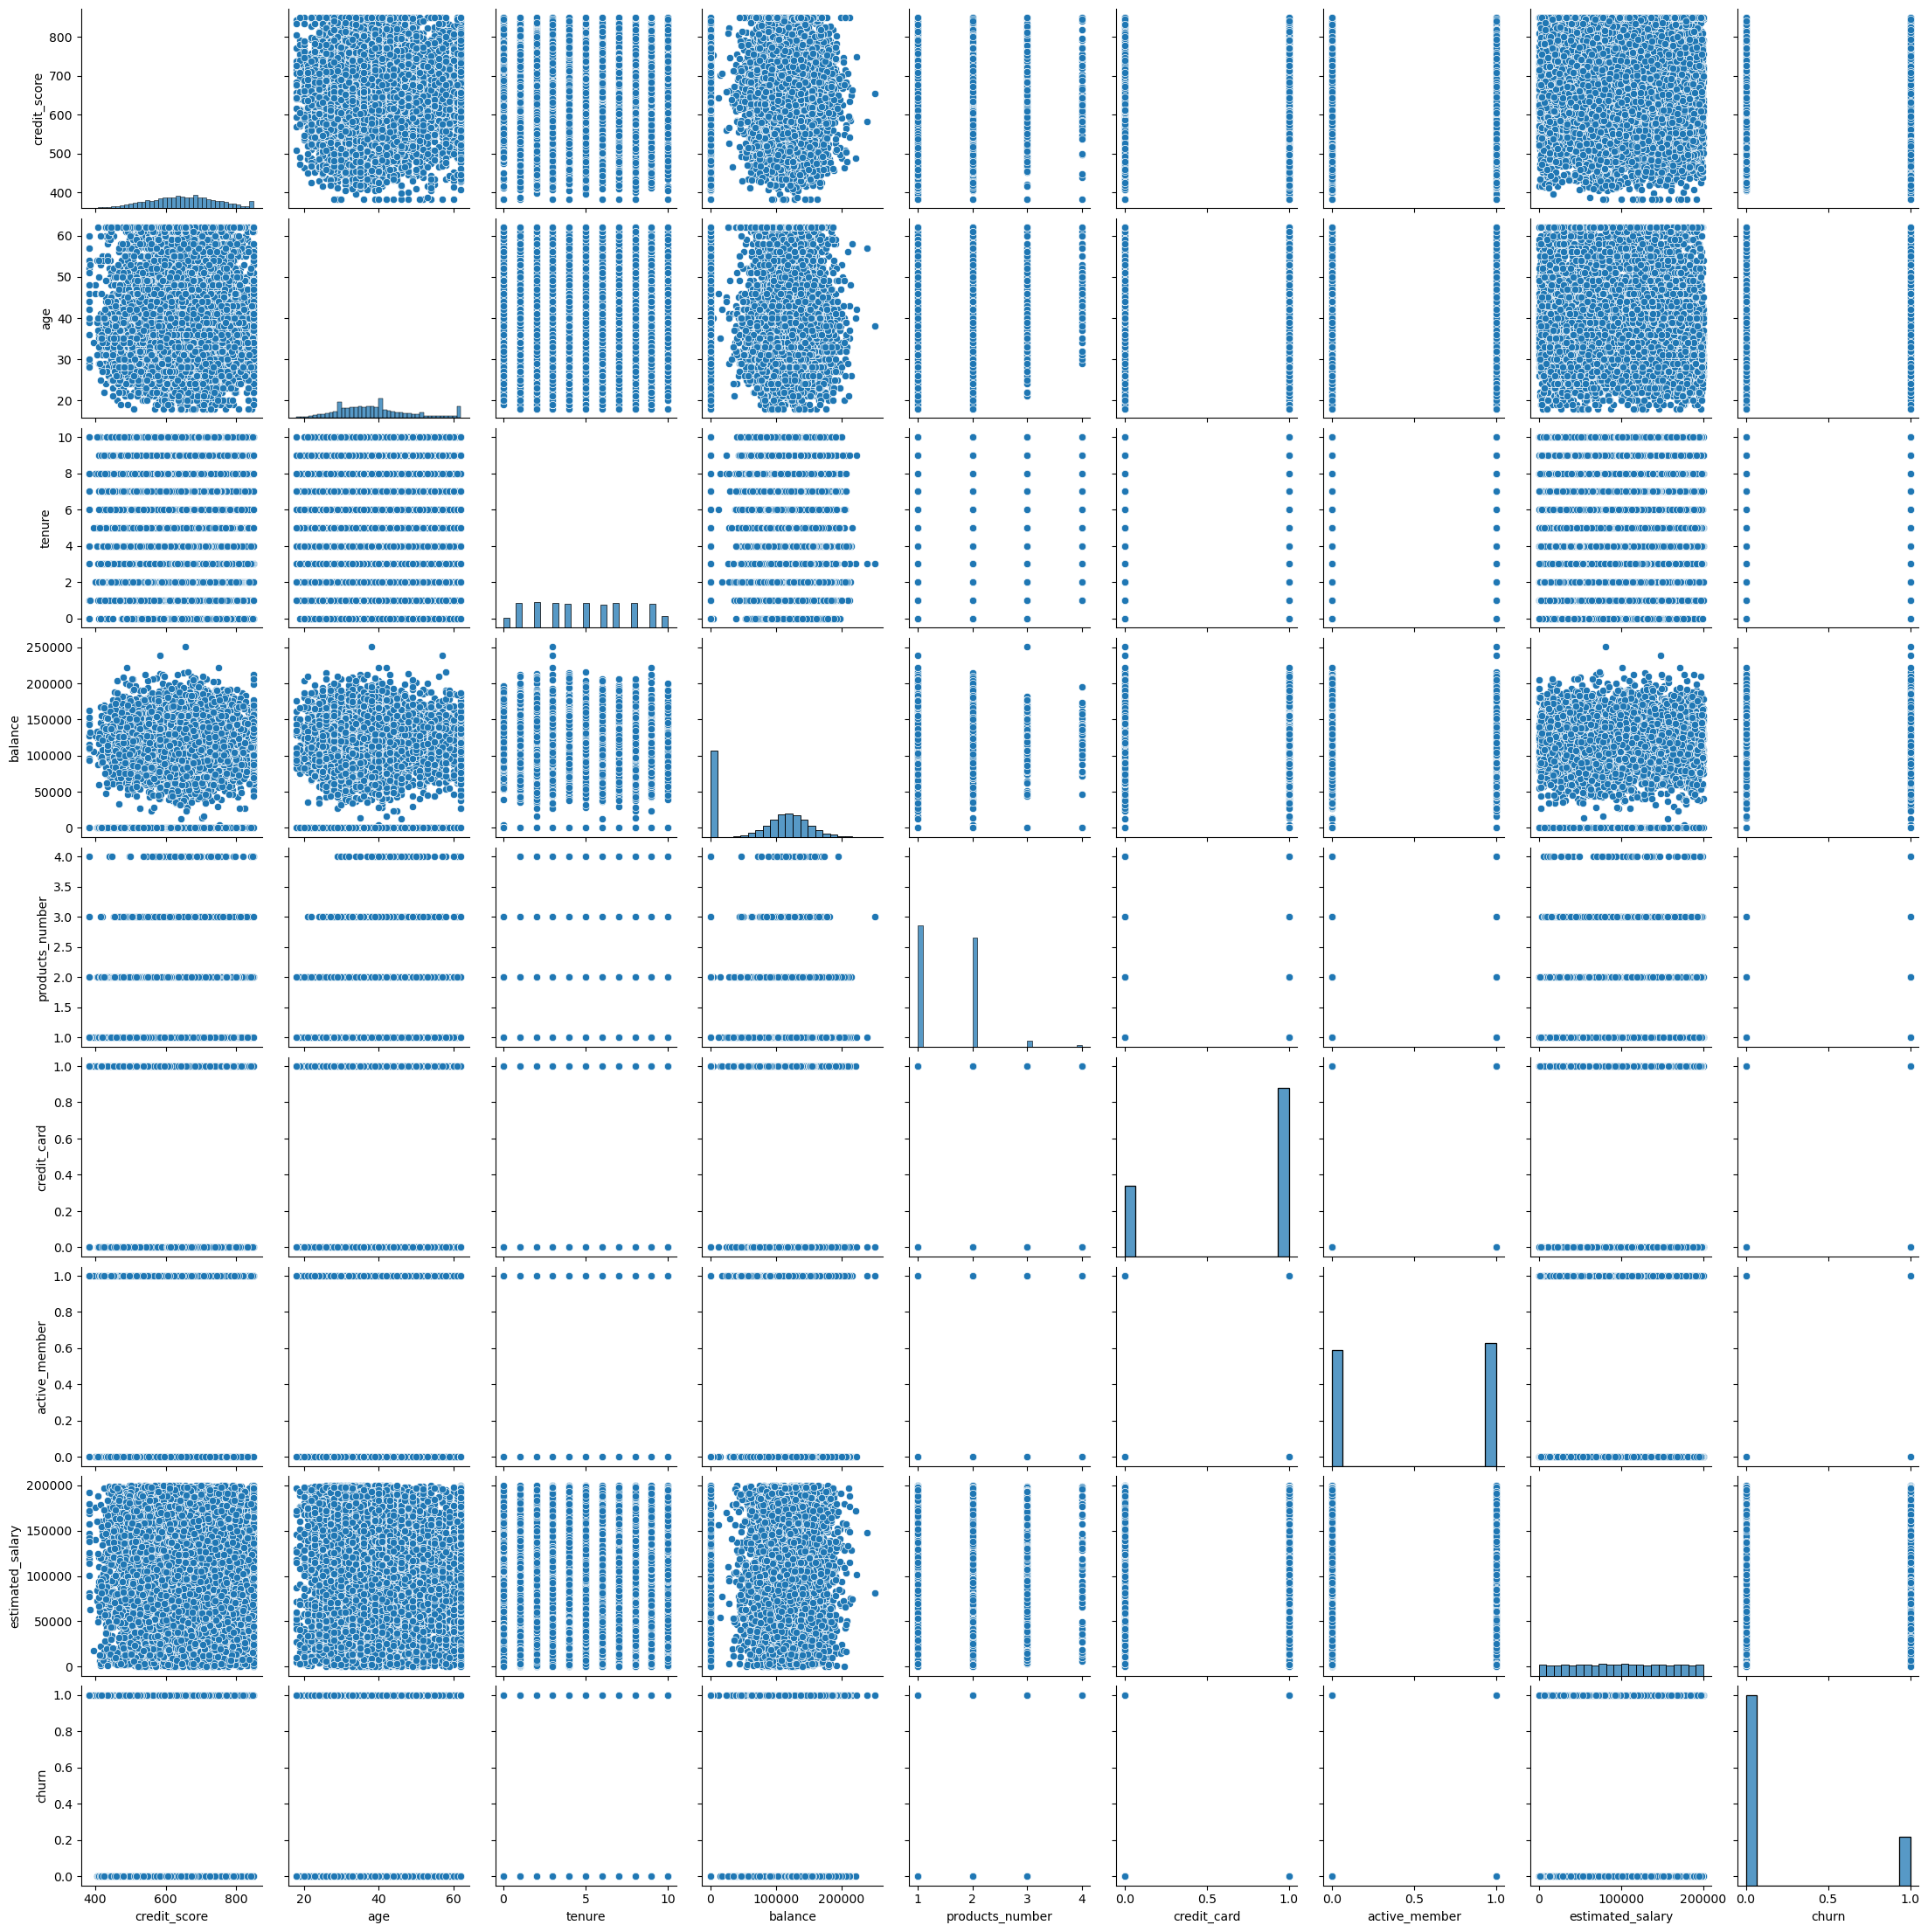

In [25]:
sns.pairplot(df)
plt.show()

# 1. Data Encoding


In [26]:
df = pd.get_dummies(df,columns=['country', 'gender'],drop_first=True, dtype = int)

In [27]:
df.sample(5)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
5083,653.0,38.0,9,149571.94,1,1,0,118383.18,0,0,1,0
4070,676.0,48.0,1,131659.59,2,0,1,14152.15,0,0,1,1
2424,573.0,31.0,2,0.00,2,1,1,91957.39,0,0,0,1
769,531.0,62.0,1,114715.71,1,0,1,24506.95,1,0,0,0
2980,850.0,41.0,3,99945.93,2,1,0,71179.31,0,0,1,0


In [28]:
X = df.drop(columns=['churn'])
y = df['churn']

In [29]:
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619.0,42.0,2,0.00,1,1,1,101348.88,0,0,0
1,608.0,41.0,1,83807.86,1,0,1,112542.58,0,1,0
2,502.0,42.0,8,159660.80,3,1,0,113931.57,0,0,0
3,699.0,39.0,1,0.00,2,0,0,93826.63,0,0,0
4,850.0,43.0,2,125510.82,1,1,1,79084.10,0,1,0


In [30]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [34]:
X_train.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2377,549.0,50.0,9,94748.76,2,0,1,13608.18,0,0,1
6515,803.0,62.0,2,151659.52,2,0,1,6930.17,0,0,0
292,583.0,27.0,7,0.00,2,1,0,51285.49,0,0,1
2859,551.0,32.0,4,0.00,2,1,0,53420.53,0,1,1
1912,687.0,29.0,4,78939.15,1,1,0,122134.56,1,0,0


# 2. Scaling The Data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[-1.05567443,  1.17176625,  1.38338787, ..., -0.58104535,
        -0.57180758,  0.91505991],
       [ 1.58343545,  2.40611392, -1.04490673, ..., -0.58104535,
        -0.57180758, -1.09282462],
       [-0.70240775, -1.19406679,  0.68958941, ..., -0.58104535,
        -0.57180758,  0.91505991],
       ...,
       [ 0.2846609 ,  1.68607778, -0.35110827, ...,  1.72103606,
        -0.57180758,  0.91505991],
       [-0.51538422,  0.24600549, -1.39180596, ..., -0.58104535,
        -0.57180758, -1.09282462],
       [-0.73357834, -0.37116835,  1.7302871 , ...,  1.72103606,
        -0.57180758,  0.91505991]])

In [39]:
X_test

array([[ 0.55480601,  0.04028088, -1.04490673, ..., -0.58104535,
        -0.57180758,  0.91505991],
       [-0.09977636, -0.37116835, -0.00420904, ..., -0.58104535,
        -0.57180758,  0.91505991],
       [-0.99333325,  0.76031702, -0.35110827, ...,  1.72103606,
        -0.57180758, -1.09282462],
       ...,
       [ 1.11587662, -1.60551602, -0.00420904, ...,  1.72103606,
        -0.57180758, -1.09282462],
       [-1.01411365, -0.16544373, -1.04490673, ..., -0.58104535,
        -0.57180758,  0.91505991],
       [ 0.11841776, -0.06258143, -0.35110827, ..., -0.58104535,
         1.74884006,  0.91505991]])

# 3. Train The Model

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
classifier = LogisticRegression()

In [42]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = classifier.predict(X_test)

# 4. Calculating Accuracy Score

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [45]:
accuracy_score(y_pred,y_test)

0.8104

In [46]:
recall_score(y_pred,y_test)

0.6037735849056604